<a href="https://colab.research.google.com/github/thanadolch/data_viz/blob/main/histrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time

In [3]:
path = '/content/drive/My Drive/DVZ'

In [4]:
search_request = pd.read_csv(os.path.join(path,'search_request.csv'))
search_request.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


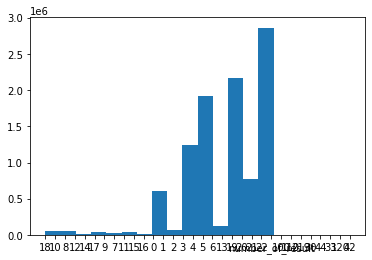

In [15]:
hist = plt.hist(list(search_request['number_of_result']),20)

In [5]:
search_request['search_timestamp'] = pd.to_datetime(search_request['search_timestamp'],format ='%Y/%m/%d %H:%M:%S.%f',errors='coerce')
search_request.head()

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


In [6]:
times = search_request['search_timestamp'].dt.time
search_request['times'] = times

In [7]:
from datetime import time

In [8]:
search1 = search_request[search_request['times'] >= time(hour=11,minute=00,second=00)]
search2 = search1[search1['times'] < time(hour=12,minute=00,second=00)]
search3 = search_request[search_request['times'] >= time(hour=23,minute=00,second=00)]
search23 = search3[search3['times'] < time(hour=23,minute=59,second=00)]

In [9]:
search2['label']='1'
search23['label']='2'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
day_of_week = search_request['search_timestamp'].dt.dayofweek
search_request['day_of_week'] = day_of_week

In [11]:
times_pair = pd.concat([search2,search23])
times_pair['day_of_week'] = times_pair['search_timestamp'].dt.dayofweek
times_pair

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long,times,label,day_of_week
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88,11:19:22.404000,1,5
6,6,3ecf13ba-be4d-4eb9-9374-a1cca09d1614,2018-06-22 11:26:40.836,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone8,4; iOS;...",ผัดไท,NaN,1m91ertp1g9a09agkl7dqtej30,17,12.4511,102.249,11:26:40.836000,1,4
15,15,abbf59dd-9631-4b3d-aa57-0bebda18b039,2018-06-22 11:48:00.258,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH@cal...",yum & tum,6967.0,668o57pjfa8tpp19ob5de4be8t,14,13.7209,100.527,11:48:00.258000,1,4
16,16,4cda5a26-93a8-4e5c-85ce-7895646bde8c,2018-06-22 11:51:55.019,"Wongnai/8.17.5 (iPhone9,4; iOS; 11.4; en_TH@ca...",Godiva,71411.0,1b47msi6le9ci8nltjo817m443,10,13.7483,100.54,11:51:55.019000,1,4
36,36,7647c7f2-02d3-4475-b207-fb7ca3daba90,2018-06-18 11:48:21.744,"Wongnai/8.17.5 (iPhone9,4; iOS; 11.4; en_TH;)",ชานมไข่มุก square one,22432.0,5gbhu646p89t2rvm9t9026h6dj,11,13.719,100.52,11:48:21.744000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10003293,10004166,c2671f83-e92a-4252-9d21-2fd898271f9b,2018-06-15 23:09:43.328,okhttp/3.9.0;WongnaiAndroid 8.16.6;samsung;SM-...,NaN,NaN,22kfoqlo0u90ur84b19nt201lg,22,NaN,NaN,23:09:43.328000,2,4
10003310,10004183,bebb851e-1e8f-44db-8506-ccbb885beb79,2018-06-15 23:09:48.517,okhttp/3.9.0;WongnaiAndroid 8.16.6;samsung;SM-...,NaN,NaN,trmfmbb4v8i8qpj2c8ec1r73c,22,NaN,NaN,23:09:48.517000,2,4
10003318,10004191,ac9d3a26-d3fb-4525-aae1-19eed4436b72,2018-06-15 23:26:20.494,okhttp/3.9.0;WongnaiAndroid 8.16.6;samsung;SM-...,NaN,NaN,5s15ptlf328j795ha8abd28a9f,22,NaN,NaN,23:26:20.494000,2,4
10003337,10004210,7a6c52a4-3976-44e2-aa23-1349fd299454,2018-06-15 23:41:48.134,okhttp/3.9.0;WongnaiAndroid 8.16.6;samsung;SM-...,NaN,92807.0,116oc2qtqc9psptj9tu02e8tfl,22,NaN,NaN,23:41:48.134000,2,4


In [12]:
time_pair.groupby('day_of_week')['search_id']

NameError: ignored

In [ ]:
fig, ax = plt.subplots()

ax.bar(times_pair['label'], times_pair['day_of_week']=='0', width, label='mon')
ax.bar(times_pair['label'], times_pair['day_of_week']=='1', width,label='tue',bottom=times_pair['day_of_week'])
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()